In [2]:
from diagrams import Diagram, Cluster
from diagrams.aws.storage import S3
from diagrams.aws.ml import TensorflowOnAWS
from diagrams.onprem.container import Docker
from diagrams.programming.framework import FastAPI
from diagrams.programming.flowchart import InputOutput
from diagrams.custom import Custom
from diagrams.generic.device import Tablet
from diagrams.programming.language import Python

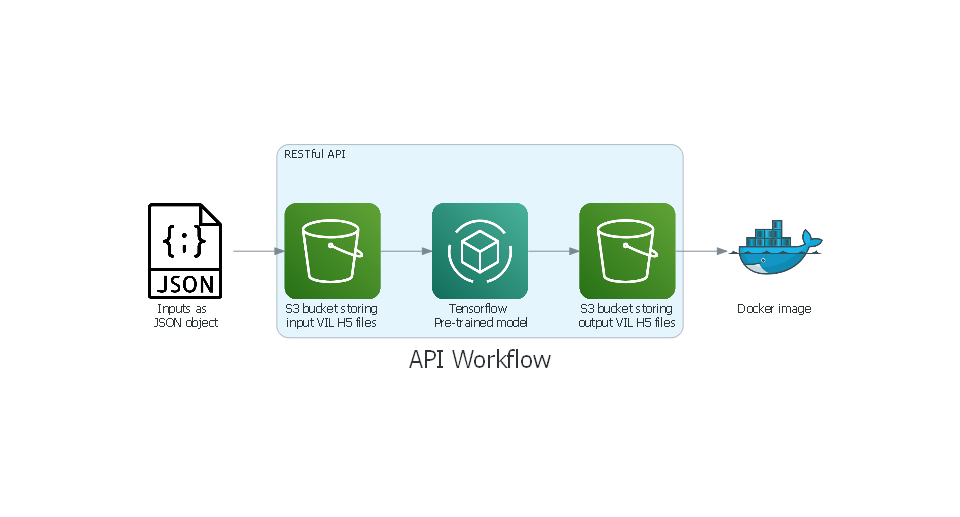

In [62]:
graph_attr = {
    "fontsize": "25",
    "size": "10"
}

with Diagram("API Workflow", direction = 'LR', graph_attr=graph_attr, outformat="jpg") as diag:
    json = Custom("Inputs as \n JSON object","json_icon.png") 
    docker = Docker("Docker image") 
    with Cluster("RESTful API"):
        restapi1 = S3("S3 bucket storing\ninput VIL H5 files") 
        restapi2 = TensorflowOnAWS("Tensorflow \n Pre-trained model")
        restapi3 = S3("S3 bucket storing\noutput VIL H5 files")  
    json >> restapi1
    restapi1 >> restapi2 >> restapi3 >> docker
diag

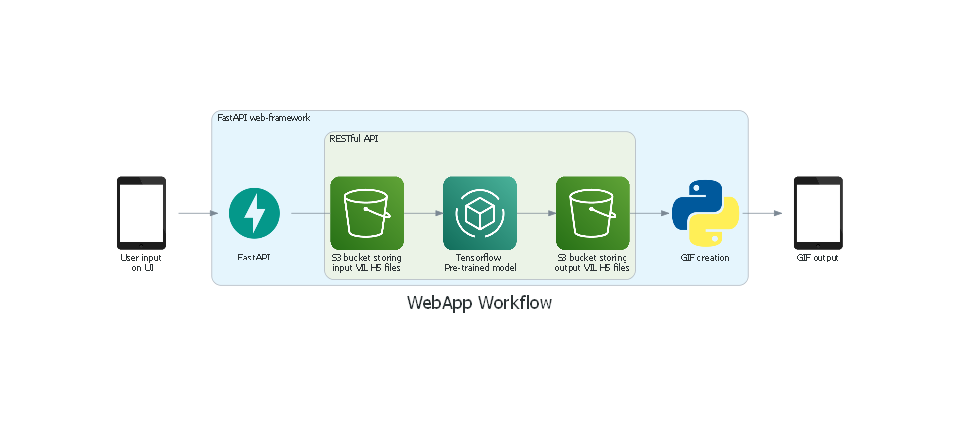

In [69]:
with Diagram("WebApp Workflow", show = False, direction = 'LR', graph_attr=graph_attr, outformat="jpg") as diag:
    tab_in = Tablet("User input\n on UI")
    tab_out = Tablet("GIF output")
    with Cluster("FastAPI web-framework"):
        fast = FastAPI("FastAPI")
        gif = Python("GIF creation")
        with Cluster("RESTful API"):
            restapi1 = S3("S3 bucket storing\ninput VIL H5 files") 
            restapi2 = TensorflowOnAWS("Tensorflow \n Pre-trained model")
            restapi3 = S3("S3 bucket storing\noutput VIL H5 files")
    tab_in >> fast
    fast - restapi1
    restapi1 >> restapi2 >> restapi3
    restapi3 >> gif >> tab_out
        
diag

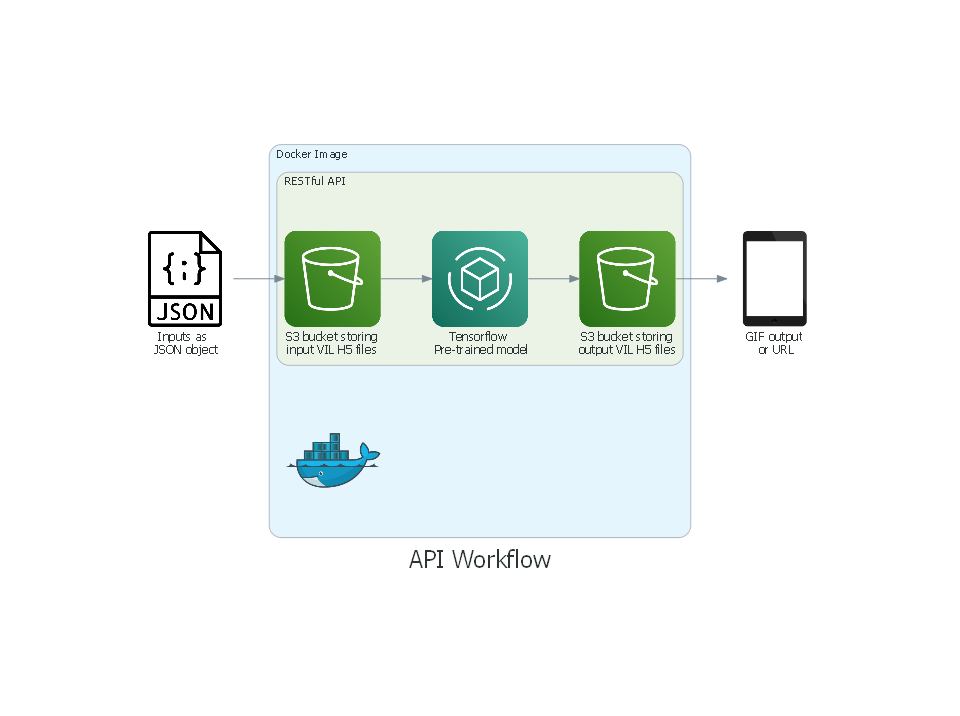

In [10]:
graph_attr = {
    "fontsize": "25",
    "size": "10"
}

with Diagram("API Workflow", direction = 'LR', graph_attr=graph_attr, outformat="jpg") as diag:
    tab_out = Tablet("URL with ")
    json = Custom("Inputs as \n JSON object","json_icon.png") 
    with Cluster("Docker Image"):
        docker = Docker("")
        with Cluster("RESTful API"):
            restapi1 = S3("S3 bucket storing\ninput VIL H5 files") 
            restapi2 = TensorflowOnAWS("Tensorflow \n Pre-trained model")
            restapi3 = S3("S3 bucket storing\noutput VIL H5 files")  
    json >> restapi1
    restapi1 >> restapi2 >> restapi3 >> tab_out
diag